In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Simple Linear Regression
### a)

In [62]:
data={"X":[1,2,3,4,5,6],"Y":[1,4,9,16,25,36]}
df=pd.DataFrame(data)
df

,X,Y
0,1,1
1,2,4
2,3,9
3,4,16
4,5,25
5,6,36


<AxesSubplot:>

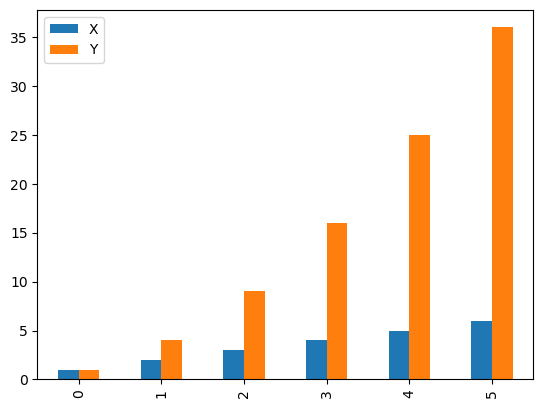

In [63]:
df.plot(kind='bar')

In [65]:
x=df['X']
y=df['Y']

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [85]:
x_train=np.reshape(np.array(x_train),(-1,1))
y_train=np.reshape(np.array(y_train),(-1,1))
x_test=np.reshape(np.array(x_test),(-1,1))
y_test=np.reshape(np.array(y_test),(-1,1))

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [88]:
slr=LinearRegression()
slr.fit(x_train,y_train)

LinearRegression()

In [136]:
slr.coef_,slr.intercept_

(array([[6.71428571]]), array([-7.35714286]))

In [115]:
y_pred=slr.predict(x_test)
y_pred,y_test

(array([[ 6.07142857],
        [12.78571429]]),
 array([[4],
        [9]], dtype=int64))

In [116]:
slr.score(x_test,y_test)

-0.48979591836735015

In [112]:
df['Pred_y']=slr.intercept_ + (np.array(df['X']).reshape(-1,1))*slr.coef_

In [113]:
df

,X,Y,Pred_y
0,1,1,-0.642857
1,2,4,6.071429
2,3,9,12.785714
3,4,16,19.500000
4,5,25,26.214286
5,6,36,32.928571


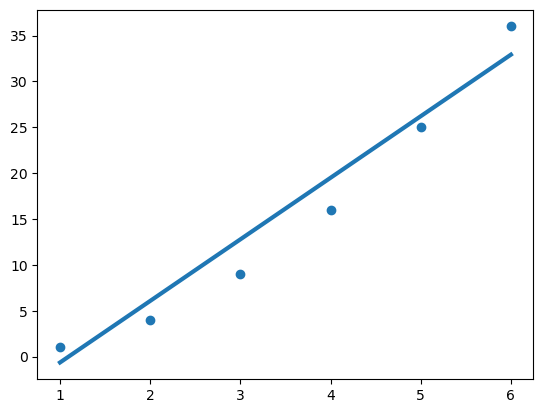

In [118]:
plt.scatter(df['X'],df['Y'])
plt.plot(df['X'],df['Pred_y'],linewidth=3)

<AxesSubplot:xlabel='X', ylabel='Y'>

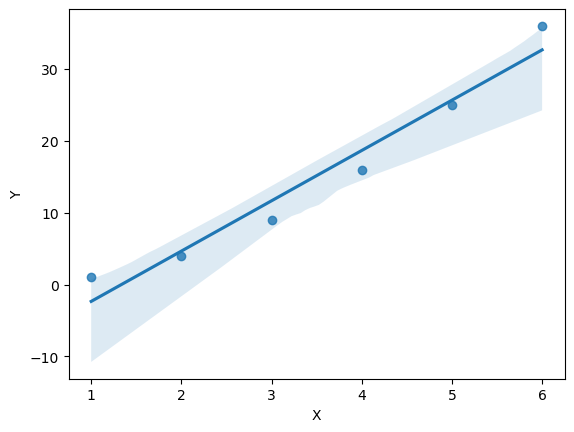

In [117]:
sns.regplot(x='X',y='Y',data=df)

In [125]:
x_new=np.array([10]).reshape(-1,1)
y_new_pred=slr.predict(x_new)
y_new_pred

array([[59.78571429]])

In [174]:
print("R2 score: ",metrics.r2_score(df['Y'],df['Pred_y']))
print("Mean Absolute Error: ",metrics.mean_absolute_error(df['Y'],df['Pred_y']))
print("Mean Squared Error: ",metrics.mean_squared_error(df['Y'],df['Pred_y']))
print("Root Mean Squared Error: ",metrics.mean_squared_error(df['Y'],df['Pred_y'])**0.5)

R2 score:  0.9502928755782439
Mean Absolute Error:  2.5476190476190474
Mean Squared Error:  7.413265306122454
Root Mean Squared Error:  2.722731221792275


### b)

In [126]:
marks={'Marks':[67,70,98,56,78,89,46,93],'Grade':[6,7,9,5,7,8,4,9]}
marks=pd.DataFrame(marks)
marks

,Marks,Grade
0,67,6
1,70,7
2,98,9
3,56,5
4,78,7
5,89,8
6,46,4
7,93,9


<AxesSubplot:>

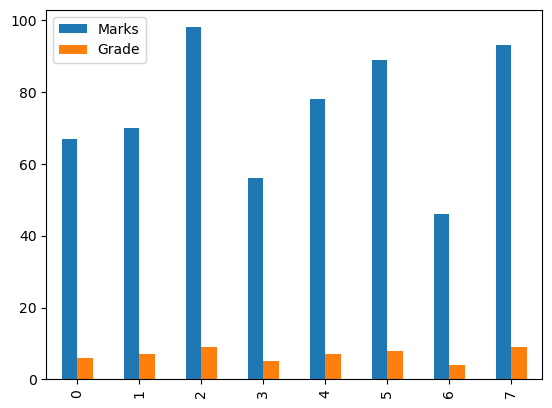

In [129]:
marks.plot(kind='bar')

In [130]:
m=marks['Marks']
g=marks['Grade']

In [131]:
m_train,m_test,g_train,g_test=train_test_split(m,g,test_size=0.2,random_state=100)

In [133]:
m_train=np.reshape(np.array(m_train),(-1,1))
g_train=np.reshape(np.array(g_train),(-1,1))
m_test=np.reshape(np.array(m_test),(-1,1))
g_test=np.reshape(np.array(g_test),(-1,1))

In [134]:
slr_m=LinearRegression()
slr_m.fit(m_train,g_train)

LinearRegression()

In [137]:
slr_m.coef_,slr_m.intercept_

(array([[0.09885521]]), array([-0.56433149]))

In [139]:
g_pred_m=slr_m.predict(m_test)
g_pred_m,g_test

(array([[6.35553316],
        [7.14637483]]),
 array([[7],
        [7]], dtype=int64))

In [145]:
marks['Pred_g']=slr_m.intercept_ + (np.array(marks['Marks']).reshape(-1,1))*slr_m.coef_

In [146]:
marks

,Marks,Grade,Pred_g
0,67,6,6.058968
1,70,7,6.355533
2,98,9,9.123479
3,56,5,4.971560
4,78,7,7.146375
5,89,8,8.233782
6,46,4,3.983008
7,93,9,8.629203


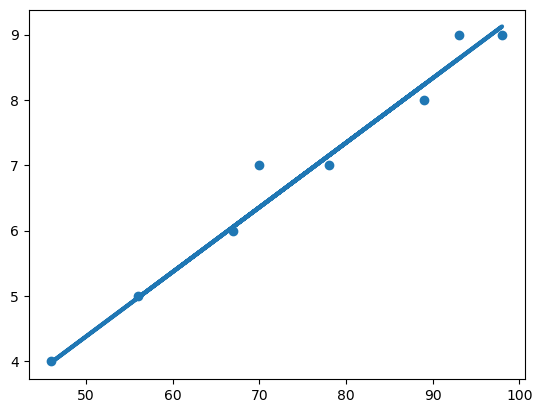

In [147]:
plt.scatter(marks['Marks'],marks['Grade'])
plt.plot(marks['Marks'],marks['Pred_g'],linewidth=3)

In [151]:
m_new=np.array([36]).reshape(-1,1)
g_new_pred=slr_m.predict(m_new)
g_new_pred

array([[2.99445604]])

In [175]:
print("R2 score: ",metrics.r2_score(marks['Grade'],marks['Pred_g']))
print("Mean Absolute Error: ",metrics.mean_absolute_error(marks['Grade'],marks['Pred_g']))
print("Mean Squared Error: ",metrics.mean_squared_error(marks['Grade'],marks['Pred_g']))
print("Root Mean Squared Error: ",metrics.mean_squared_error(marks['Grade'],marks['Pred_g'])**0.5)

R2 score:  0.9716402444506251
Mean Absolute Error:  0.20291237670098594
Mean Squared Error:  0.08109117602399363
Root Mean Squared Error:  0.2847651243112359


## Multiple Linear Regression

In [153]:
income={"QD":[100,75,80,70,50,65,90,100,110,60],"Price":[5,7,6,6,8,7,5,4,3,9],"Income":[1000,600,1200,500,300,400,1300,1100,1300,300]}
income=pd.DataFrame(income)
income

,QD,Price,Income
0,100,5,1000
1,75,7,600
2,80,6,1200
3,70,6,500
4,50,8,300
5,65,7,400
6,90,5,1300
7,100,4,1100
8,110,3,1300
9,60,9,300


In [155]:
i=income.iloc[:,1:]
q=income['QD']

In [156]:
i_train,i_test,q_train,q_test=train_test_split(i,q,test_size=0.2,random_state=100)

In [157]:
slr_inc=LinearRegression()
slr_inc.fit(i_train,q_train)

LinearRegression()

In [158]:
slr_inc.coef_,slr_inc.intercept_

(array([-6.37340497,  0.0192411 ]), 103.41168569509739)

In [159]:
q_pred=slr_inc.predict(i_test)
q_pred,q_test

(array([99.08327737, 96.55809268]),
 7    100
 6     90
 Name: QD, dtype: int64)

In [160]:
slr_inc.score(i_test,q_test)

0.12302080039835861

In [170]:
income['Pred_qd']=slr_inc.intercept_ + ((np.array(slr_inc.coef_).reshape(-1,1).T)@i.T).T

In [171]:
income

,QD,Price,Income,Pred_qd
0,100,5,1000,90.785762
1,75,7,600,70.342512
2,80,6,1200,88.260578
3,70,6,500,74.791807
4,50,8,300,58.196776
5,65,7,400,66.494291
6,90,5,1300,96.558093
7,100,4,1100,99.083277
8,110,3,1300,109.304903
9,60,9,300,51.823371


In [176]:
print("R2 score: ",metrics.r2_score(income['QD'],income['Pred_qd']))
print("Mean Absolute Error: ",metrics.mean_absolute_error(income['QD'],income['Pred_qd']))
print("Mean Squared Error: ",metrics.mean_squared_error(income['QD'],income['Pred_qd']))
print("Root Mean Squared Error: ",metrics.mean_squared_error(income['QD'],income['Pred_qd'])**0.5)

R2 score:  0.890318158980282
Mean Absolute Error:  5.296171927468099
Mean Squared Error:  37.8402351518027
Root Mean Squared Error:  6.151441713273621
